In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
play_store_data = pd.read_csv("Play Store Data.csv")

In [3]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
user_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [5]:
play_store_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<AxesSubplot:>

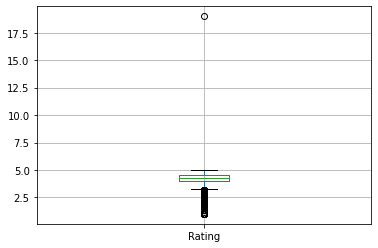

In [7]:
play_store_data.boxplot()

In [8]:
# as we can see there is a outlier 
# let's find and remove that
play_store_data[play_store_data.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
play_store_data.drop([play_store_data.Rating.idxmax()],inplace=True)

<AxesSubplot:>

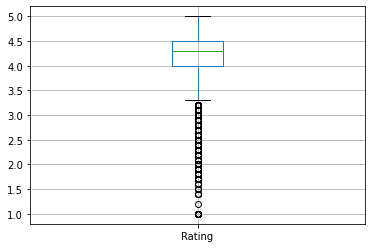

In [10]:
play_store_data.boxplot()

In [11]:
play_store_data.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [12]:
median_rating = play_store_data["Rating"].median()
median_rating

4.3

In [13]:
play_store_data["Rating"] = play_store_data["Rating"].transform(lambda x: x.fillna(median_rating))
# we use transform here because the apply will give us an error while working with float numbers

In [14]:
play_store_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [15]:
play_store_data[play_store_data.Type.isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [16]:
play_store_data.Type.mode()[0]

'Free'

In [17]:
play_store_data.Type.fillna(play_store_data.Type.mode()[0],inplace=True)

In [18]:
play_store_data.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [19]:
play_store_data["Current Ver"].fillna(play_store_data["Current Ver"].mode()[0],inplace=True)
play_store_data["Android Ver"].fillna(play_store_data["Android Ver"].mode()[0],inplace=True)

In [20]:
play_store_data.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [21]:
play_store_data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8038,CX-OF,FAMILY,4.2,18,37M,"1,000+",Free,0,Everyone,Entertainment,"January 31, 2018",7.2.1,4.3 and up
664,"Hily: Dating, Chat, Match, Meet & Hook up",DATING,4.1,2560,56M,"100,000+",Free,0,Mature 17+,Dating,"August 1, 2018",2.5.2,4.1 and up
4249,Jetpack Joyride,GAME,4.4,4637439,96M,"100,000,000+",Free,0,Everyone 10+,Arcade,"July 19, 2018",1.10.12,4.1 and up
3199,Hotwire Hotel & Car Rental App,TRAVEL_AND_LOCAL,4.3,10323,Varies with device,"1,000,000+",Free,0,Everyone,Travel & Local,"July 19, 2018",Varies with device,Varies with device
9043,DX Gashacon Sword for Ex-Aid Henshin,FAMILY,4.3,17,42M,"1,000+",Free,0,Everyone,Simulation,"July 14, 2018",1.0,4.1 and up


In [22]:
#let's remove $ sign from price col
play_store_data["Price"] = play_store_data["Price"].apply(lambda x: str(x).replace("$","") if "$" in str(x) else str(x))

In [23]:
# now let's convert Price col to float 
play_store_data["Price"] = play_store_data["Price"].apply(lambda x: float(x))

In [24]:
play_store_data["Price"].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [25]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.2+ MB


In [26]:
play_store_data["Last Updated"] =play_store_data["Last Updated"].astype('datetime64[ns]')

In [27]:
play_store_data["Reviews"] = play_store_data["Reviews"].astype("int")

In [28]:
type(play_store_data["Installs"][0])

str

In [29]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [30]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          10840 non-null  float64       
 3   Reviews         10840 non-null  int32         
 4   Size            10840 non-null  object        
 5   Installs        10840 non-null  object        
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10840 non-null  object        
 12  Android Ver     10840 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(9)
memory usage: 1.4+ MB


## Size:

In [31]:
#Data type of Size is object. I had to convert the column because it contains the application sizes. 
play_store_data['Size'] = play_store_data.Size.replace("Varies with device",np.nan)
play_store_data['Size'] = play_store_data.Size.str.replace("M","000") # All size values became the kilobyte type.
play_store_data['Size'] = play_store_data.Size.str.replace("k","")
play_store_data['Size'] = play_store_data.Size.replace("1,000+",1000)
play_store_data['Size'] =play_store_data['Size'].astype(float)

In [32]:
play_store_data['Size'].dtype

dtype('float64')

In [33]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [34]:
play_store_data.corr()

,Rating,Reviews,Size,Price
Rating,1.000000,0.063166,0.064565,-0.019318
Reviews,0.063166,1.000000,0.233791,-0.009667
Size,0.064565,0.233791,1.000000,-0.022772
Price,-0.019318,-0.009667,-0.022772,1.000000


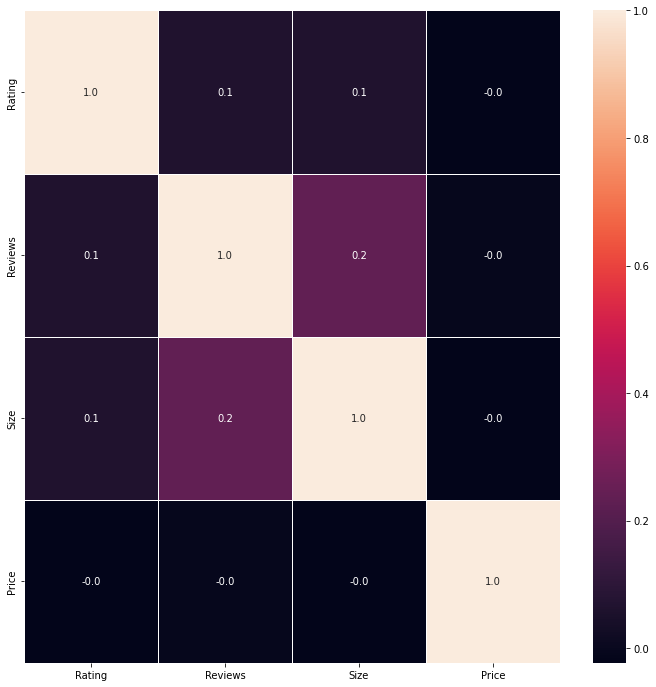

In [35]:
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(play_store_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [36]:
category_list = list(play_store_data['Category'].unique())

In [37]:
play_store_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

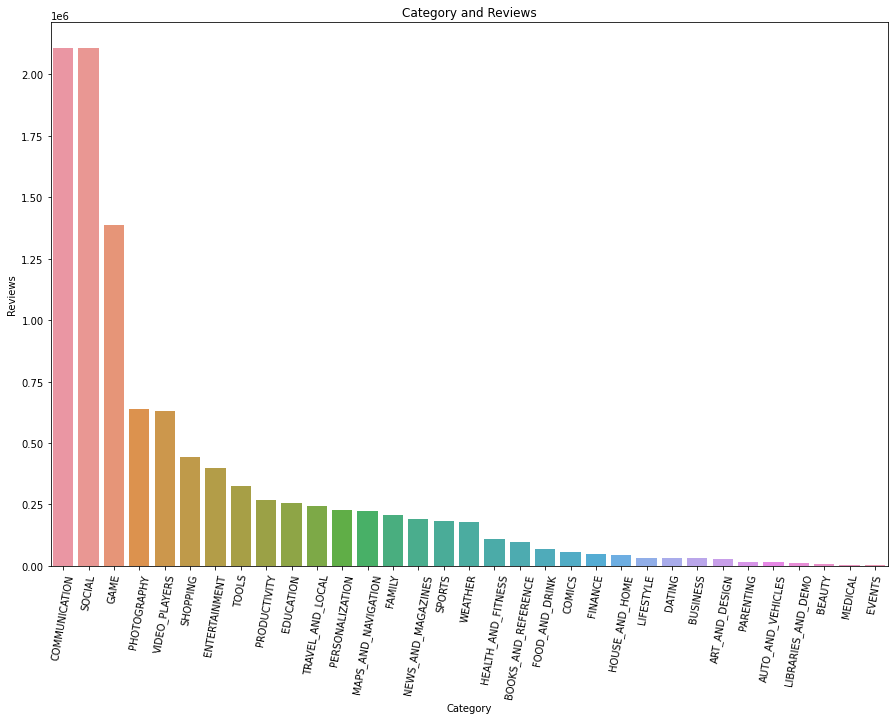

In [38]:
category_review = []
for i in category_list:
    x = play_store_data[play_store_data['Category'] == i]
    if(len(x)!=0):
        review = sum(x.Reviews)/len(x)
        category_review.append(review)
    else:
        review = sum(x.Reviews)
        category_review.append(review)
#sorting
data_category_reviews = pd.DataFrame({'category': category_list,'review':category_review})
new_index = (data_category_reviews['review'].sort_values(ascending=False)).index.values
sorted_data =data_category_reviews.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['category'], y=sorted_data['review'])
plt.xticks(rotation=80)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

## Easy Way

In [39]:
catagory_review = play_store_data.groupby("Category")["Reviews"].mean().sort_values(ascending=False).reset_index()

In [40]:
catagory_review.head()

,Category,Reviews
0,COMMUNICATION,2.107138e+06
1,SOCIAL,2.105903e+06
2,GAME,1.385859e+06
3,PHOTOGRAPHY,6.373631e+05
4,VIDEO_PLAYERS,6.307439e+05


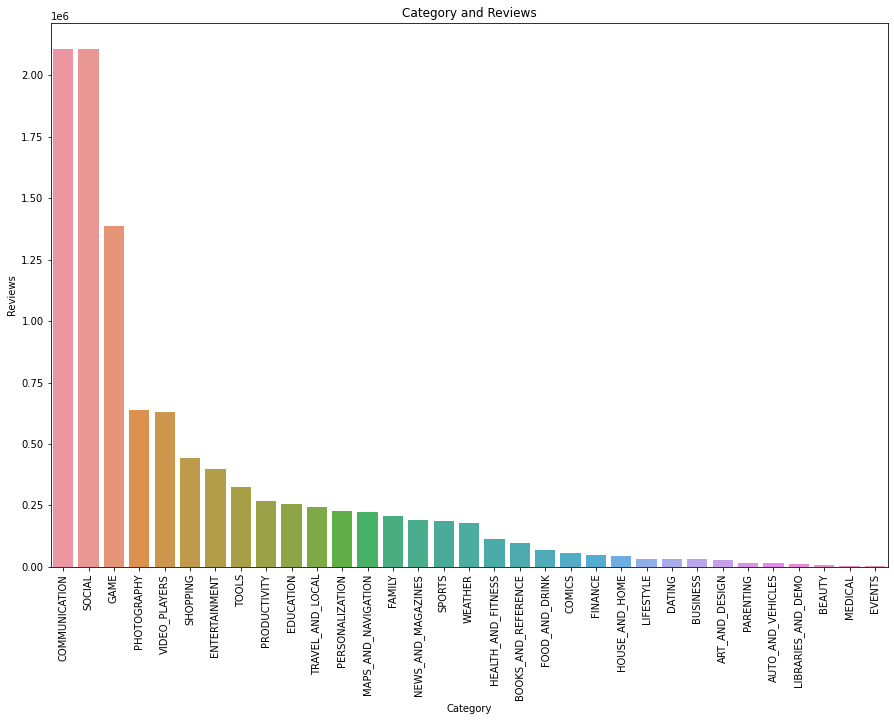

In [41]:
plt.figure(figsize=(15,10))
sns.barplot(x=catagory_review['Category'], y=catagory_review['Reviews'])
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Reviews")
plt.title("Category and Reviews")
plt.show()

## Category and Installs

In [42]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [43]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          10840 non-null  float64       
 3   Reviews         10840 non-null  int32         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  object        
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10840 non-null  object        
 12  Android Ver     10840 non-null  object        
dtypes: datetime64[ns](1), float64(3), int32(1), object(8)
memory usage: 1.4+ MB


In [44]:
# convert install column from object to int
play_store_data["Installs"] = play_store_data["Installs"].str.replace(",","").str.replace("+","").astype(int)

C:\Users\prade\AppData\Local\Temp\ipykernel_304\3061026013.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  play_store_data["Installs"] = play_store_data["Installs"].str.replace(",","").str.replace("+","").astype(int)


In [45]:
play_store_data.Installs.dtype

dtype('int32')

In [46]:
catagory_install = play_store_data.groupby("Category").agg({"Installs":"mean"}).reset_index().sort_values(by="Installs",ascending=False)

In [47]:
catagory_install.head()

,Category,Installs
6,COMMUNICATION,8.435989e+07
27,SOCIAL,4.769447e+07
31,VIDEO_PLAYERS,3.555430e+07
25,PRODUCTIVITY,3.343418e+07
14,GAME,3.066960e+07


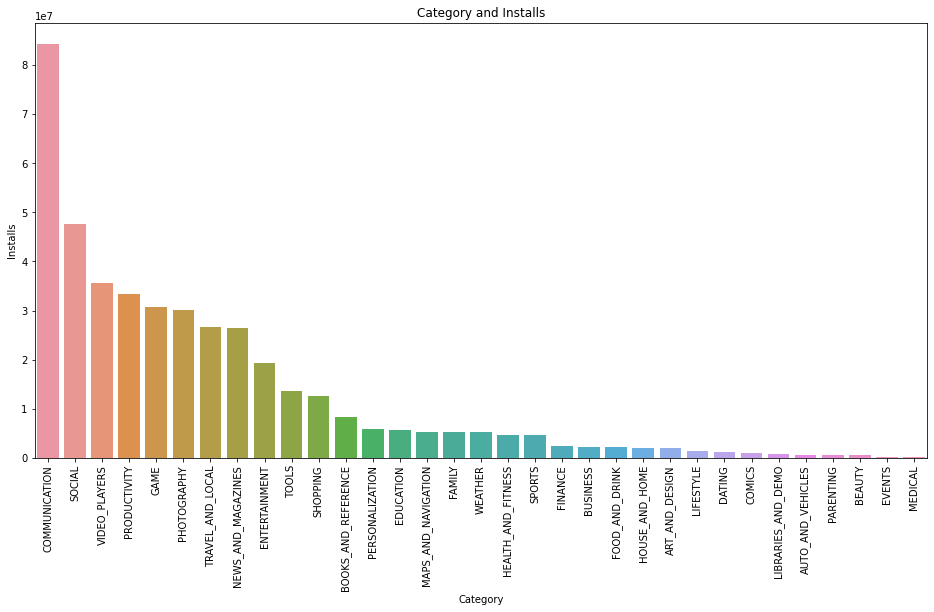

In [48]:
plt.figure(figsize=(16,8))
sns.barplot(x = catagory_install["Category"],y = catagory_install["Installs"])
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Category and Installs")
plt.show()

## Content Rating

In [49]:
play_store_data["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [50]:
Content_Rating = play_store_data.groupby("Content Rating").size().sort_values(ascending=False).reset_index()

<function matplotlib.pyplot.show(close=None, block=None)>

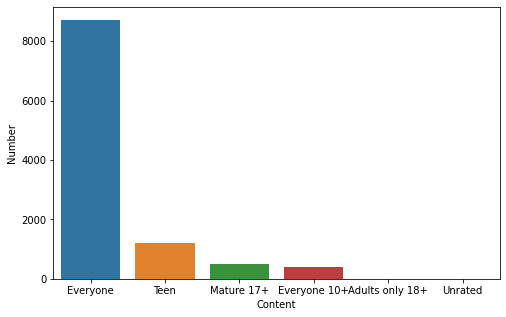

In [51]:
plt.figure(figsize=(8,5))
sns.barplot(x=Content_Rating["Content Rating"],y=Content_Rating[0])
plt.xlabel("Content")
plt.ylabel("Number")
plt.show

## App with Highest review

In [52]:
play_store_data["Reviews"].max()

78158306

In [53]:
play_store_data.iloc[play_store_data["Reviews"].idxmax()][0]

'Facebook'

In [54]:
### top 5
top5_apps = play_store_data.groupby("App")["Reviews"].max().reset_index().sort_values(by="Reviews",ascending=False)[:5]

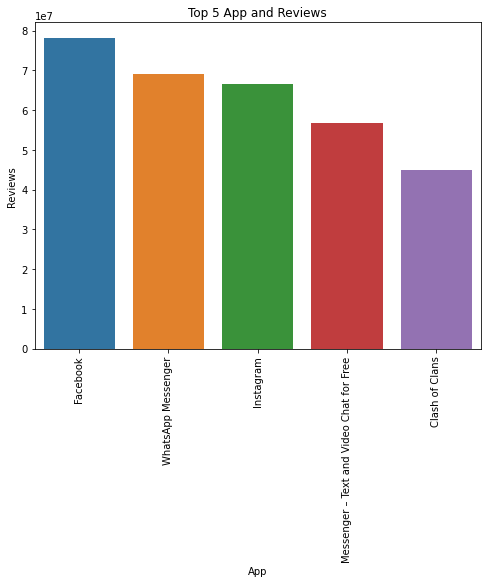

In [55]:
plt.figure(figsize=(8,6))
sns.barplot(x=top5_apps["App"],y=top5_apps["Reviews"])
plt.xticks(rotation=90)
plt.xlabel("App")
plt.ylabel("Reviews")
plt.title("Top 5 App and Reviews")
plt.show()

In [56]:
top5_apps

,App,Reviews
4328,Facebook,78158306
9041,WhatsApp Messenger,69119316
5399,Instagram,66577446
6165,Messenger – Text and Video Chat for Free,56646578
2564,Clash of Clans,44893888


In [57]:
play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


## Free and paid

In [60]:
play_store_data.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [68]:
type_col = play_store_data.groupby(["Type"]).size().reset_index()
type_col

,Type,0
0,Free,10040
1,Paid,800


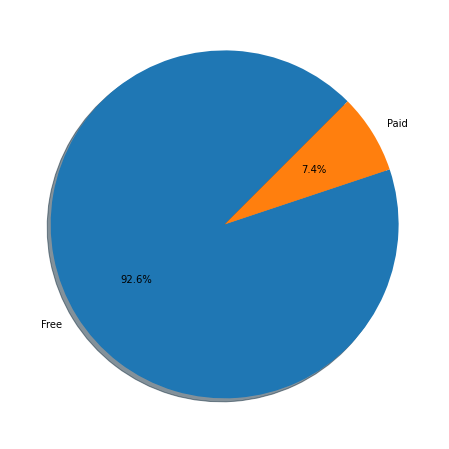

In [70]:
x = type_col["Type"]
y = type_col[0]
fig = plt.figure(figsize = (8, 8))
plt.pie (y , labels= x , startangle=45, autopct='%1.1f%%',shadow = True)
plt.show()